In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Figure out the start point - what does our (raw) data look like now?

In [2]:
df = pd.read_csv('Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv')

In [3]:
df

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,...,Other Description (Non-city-based Ethnic),Paper (Non-city-based General),TV/Radio (Non-city-based General),Website (Non-city-based General),Social Networks (Non-city-based General),People (Non-city-based General),Other (Non-city-based General),Other Description (Non-city-based General),Preferred Type,Concerns
0,80314,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60171,60.0,Male,Chinese,Married,13.0,6.0,0,0,Living with children,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011601,23.0,Female,Chinese,Single,16.0,3.0,0,0,0,...,NaN,No,No,No,No,Yes,No,NaN,email,traffic
3,50046,73.0,Female,Chinese,Other,13.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10494,29.0,Male,Asian Indian,Single,17.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,40223,70.0,Female,Other,Single,17.0,5.0,0,0,Living with children,...,NaN,Yes,No,Yes,No,Yes,No,NaN,newsletter,NaN
2605,10330,68.0,Male,Other,Married,17.0,2.0,0,Living with spouse,0,...,NaN,No,Yes,No,No,Yes,No,NaN,email,NaN
2606,11081000,76.0,Female,Filipino,Single,13.0,7.0,0,0,Living with children,...,0,No,No,No,No,No,No,0,mail,traffic
2607,10953000,50.0,Male,Filipino,Single,17.0,4.0,0,Living with spouse,0,...,NaN,No,No,Yes,No,No,No,NaN,website,NaN


In [4]:
new_colnames = [i.lower() for i in df.columns]
new_colnames = [i.replace(" ","_") for i in new_colnames]
asian = df.copy()
asian.columns = new_colnames

In [5]:
asian

,survey_id,age,gender,ethnicity,marital_status,education_completed,household_size,no_one,spouse,children,...,other_description_(non-city-based_ethnic),paper_(non-city-based_general),tv/radio_(non-city-based_general),website_(non-city-based_general),social_networks_(non-city-based_general),people_(non-city-based_general),other_(non-city-based_general),other_description_(non-city-based_general),preferred_type,concerns
0,80314,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60171,60.0,Male,Chinese,Married,13.0,6.0,0,0,Living with children,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011601,23.0,Female,Chinese,Single,16.0,3.0,0,0,0,...,NaN,No,No,No,No,Yes,No,NaN,email,traffic
3,50046,73.0,Female,Chinese,Other,13.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10494,29.0,Male,Asian Indian,Single,17.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,40223,70.0,Female,Other,Single,17.0,5.0,0,0,Living with children,...,NaN,Yes,No,Yes,No,Yes,No,NaN,newsletter,NaN
2605,10330,68.0,Male,Other,Married,17.0,2.0,0,Living with spouse,0,...,NaN,No,Yes,No,No,Yes,No,NaN,email,NaN
2606,11081000,76.0,Female,Filipino,Single,13.0,7.0,0,0,Living with children,...,0,No,No,No,No,No,No,0,mail,traffic
2607,10953000,50.0,Male,Filipino,Single,17.0,4.0,0,Living with spouse,0,...,NaN,No,No,Yes,No,No,No,NaN,website,NaN


In [6]:
asian = asian[['income', 'retired', 'us_born', 'english_speaking', 'english_difficulties', 'ethnicity','age', 'regular_exercise', 'healthy_diet', 'heart_disease', 'drinking', 'smoking',
               'cancer', 'health_insurance', 'physical_check-up', 'quality_of_life', 'religion', 'gender', 'close_friends', 'discrimination_', 'duration_of_residency', 'household_size',
              'education_completed']]
asian


,income,retired,us_born,english_speaking,english_difficulties,ethnicity,age,regular_exercise,healthy_diet,heart_disease,...,health_insurance,physical_check-up,quality_of_life,religion,gender,close_friends,discrimination_,duration_of_residency,household_size,education_completed
0,NaN,NaN,NaN,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"$30,000 - $39,999",Retired,No,Not at all,Not much,Chinese,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Buddhist,Male,NaN,NaN,0.5,6.0,13.0
2,"$0 - $9,999",0,No,Well,Much,Chinese,23.0,0.0,1.0,0.0,...,0,Yes,8.0,Buddhist,Female,4.0,0.0,11.0,3.0,16.0
3,NaN,Retired,No,Not well,NaN,Chinese,73.0,1.0,1.0,0.0,...,Yes,0,NaN,Protestant,Female,NaN,0.0,50.0,1.0,13.0
4,NaN,0,No,Well,Very much,Asian Indian,29.0,0.0,NaN,NaN,...,NaN,NaN,NaN,Hindu,Male,NaN,NaN,7.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,"$30,000 - $39,999",Retired,No,Well,Not much,Other,70.0,1.0,1.0,0.0,...,Yes,Yes,8.0,Buddhist,Female,2.0,0.0,44.0,5.0,17.0
2605,"$60,000 - $69,999",Retired,No,Well,Not at all,Other,68.0,1.0,1.0,0.0,...,Yes,Yes,9.0,Buddhist,Male,3.0,0.0,46.0,2.0,17.0
2606,"$10,000 - $19,999",0,No,Well,Much,Filipino,76.0,0.0,0.0,0.0,...,Yes,Yes,6.0,Catholic,Female,2.0,1.0,30.0,7.0,13.0
2607,"$10,000 - $19,999",0,No,Not well,Much,Filipino,50.0,1.0,1.0,0.0,...,Yes,Yes,6.0,Catholic,Male,3.0,0.0,20.0,4.0,17.0


In [7]:
asian = asian.rename(columns = {'discrimination_':'discrimination', 'physical_check-up':'physical_checkup'})
asian

,income,retired,us_born,english_speaking,english_difficulties,ethnicity,age,regular_exercise,healthy_diet,heart_disease,...,health_insurance,physical_checkup,quality_of_life,religion,gender,close_friends,discrimination,duration_of_residency,household_size,education_completed
0,NaN,NaN,NaN,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"$30,000 - $39,999",Retired,No,Not at all,Not much,Chinese,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Buddhist,Male,NaN,NaN,0.5,6.0,13.0
2,"$0 - $9,999",0,No,Well,Much,Chinese,23.0,0.0,1.0,0.0,...,0,Yes,8.0,Buddhist,Female,4.0,0.0,11.0,3.0,16.0
3,NaN,Retired,No,Not well,NaN,Chinese,73.0,1.0,1.0,0.0,...,Yes,0,NaN,Protestant,Female,NaN,0.0,50.0,1.0,13.0
4,NaN,0,No,Well,Very much,Asian Indian,29.0,0.0,NaN,NaN,...,NaN,NaN,NaN,Hindu,Male,NaN,NaN,7.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,"$30,000 - $39,999",Retired,No,Well,Not much,Other,70.0,1.0,1.0,0.0,...,Yes,Yes,8.0,Buddhist,Female,2.0,0.0,44.0,5.0,17.0
2605,"$60,000 - $69,999",Retired,No,Well,Not at all,Other,68.0,1.0,1.0,0.0,...,Yes,Yes,9.0,Buddhist,Male,3.0,0.0,46.0,2.0,17.0
2606,"$10,000 - $19,999",0,No,Well,Much,Filipino,76.0,0.0,0.0,0.0,...,Yes,Yes,6.0,Catholic,Female,2.0,1.0,30.0,7.0,13.0
2607,"$10,000 - $19,999",0,No,Not well,Much,Filipino,50.0,1.0,1.0,0.0,...,Yes,Yes,6.0,Catholic,Male,3.0,0.0,20.0,4.0,17.0


### Research question(s)

Clearly states complex research question(s) that leads to significant potential for interesting analyses.

---

1. Scatterplot between `duration_of_residency` and `close_friends` would tell us 

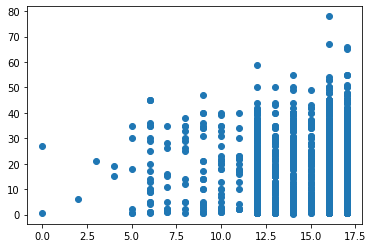

In [28]:
plt.scatter(asian['education_completed'], asian['duration_of_residency'])

In [32]:
#plt.hist(asian['ethnicity'])
freq = pd.crosstab(index=asian['ethnicity'], columns='count')

TypeError: 'value' must be an instance of str or bytes, not a float

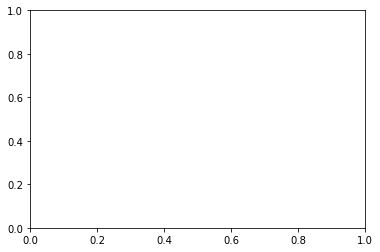

In [34]:
plt.bar(asian['ethnicity'], height = freq['count'])

In [36]:
asian['ethnicity'].isnull()

True

---

### Step 2: Set analysis goals - what kind of analyses might we want to run based on the available data?

### Step 3: Define the end point - what form do we want the data in for analysis?

### Step 4: Make a task list - what do we need to do to get our data from the start to the end point?